In [1]:
!pip install impyute

In [2]:
# Importing libraries that we will need.

import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from impyute import mice
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest

In [3]:
# Upload DataFrame

df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Deleting column id from DataFrame

df = df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Extracting information about DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


So we can see that our DataFrame has 11 columns and total samples 5110. The column bmi has 201 NaN values. Stroke, Hypertension and heart_disease are categorical features and has binar values. Our DataFrame is inbalanced.

In [6]:
# I'm printing information about how many unique data a column 'ever_married' has.

df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
# Converting string in integer.

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# Apply for column "ever_married" method 'value_counts' to look how many unique values in the column after converting.
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [9]:
# I'm printing information about how many unique data a column 'Residence_type' has.

df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [10]:
# Converting string in integer.

df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [11]:
df['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [12]:
# I'm using method "get_dummies" to convert string in integer in the following columns.

df = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status'], drop_first=True)

In [13]:
# Here I'm mooving the column 'stroke' to the last column

df = df[['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi',
         'gender_Male', 'gender_Other', 'work_type_Never_worked', 'work_type_Private','work_type_Self-employed',
         'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 
          'stroke']]

df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,0,202.21,NaN,0,0,0,0,1,0,0,1,0,1
2,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,1,1,171.23,34.4,0,0,0,1,0,0,0,0,1,1
4,79.0,1,0,1,0,174.12,24.0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,NaN,0,0,0,1,0,0,0,1,0,0
5106,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,1,0,0
5107,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,1,0,0
5108,51.0,0,0,1,0,166.29,25.6,1,0,0,1,0,0,1,0,0,0


### Now how we can see our DataFrame doesn't has object values.

In [14]:
# Now i'm cheking how many NaN values has our DataFrame.

df.isna().sum()

age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
gender_Male                         0
gender_Other                        0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
stroke                              0
dtype: int64

In [15]:
df.isna()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# We make a function which will return_accuracy score for the following DataFrames   

def get_knn_acc(df):
    X = df.drop(['stroke'], axis=1).values
    y = df['stroke'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    return accuracy_score(knn.predict(X_test), y_test)

In [17]:
# We creating copies of our DataFrame.

drop_df = df.copy()
zero_df = df.copy()
mean_df = df.copy()
median_df = df.copy()
mice_df = df.copy()
knn_df = df.copy()

In [18]:
# I use function dropna. in this function we drop all NaN values.

drop_df = drop_df.dropna()

In [19]:
# Accuracy score for the function above.

get_knn_acc(drop_df)

0.9429967426710097

In [20]:
# I use function fillna. In this function we fill all NaN values with zeros.

zero_df = zero_df.fillna(0)

In [21]:
# Accuracy score for the function above.

get_knn_acc(zero_df)

0.935054773082942

In [22]:
X = zero_df[['avg_glucose_level', 'bmi']].values

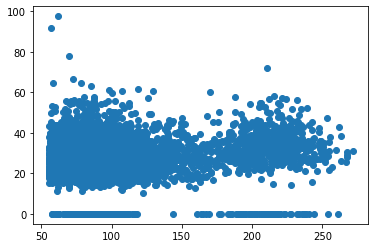

In [23]:
plt.scatter(X[:, 0], X[:, 1])

In [24]:
df.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.893237,0.413894,0.000196,0.004305,0.572407,0.160274,0.134442,0.173190,0.370254,0.154403,0.048728
std,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.854067,0.492578,0.013989,0.065480,0.494778,0.366896,0.341160,0.378448,0.482920,0.361370,0.215320
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,33.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# I use function fillna. In this function we fill all NaN values with mean of columns.

mean_df = mean_df.fillna(mean_df.mean())

In [26]:
# Accuracy score for the function above.

get_knn_acc(mean_df)

0.9334898278560251

In [27]:
# I use function fillna. In this function we fill all NaN values with median of columns.

median_df = median_df.fillna(median_df.median())

In [28]:
get_knn_acc(median_df)

0.9358372456964006

In [29]:
mice_df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,0,202.21,NaN,0,0,0,0,1,0,0,1,0,1
2,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,1,1,171.23,34.4,0,0,0,1,0,0,0,0,1,1
4,79.0,1,0,1,0,174.12,24.0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,NaN,0,0,0,1,0,0,0,1,0,0
5106,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,1,0,0
5107,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,1,0,0
5108,51.0,0,0,1,0,166.29,25.6,1,0,0,1,0,0,1,0,0,0


In [30]:
X = mice_df.values
X_filled = mice(X)

In [31]:
full_df = pd.DataFrame(X_filled, columns=mice_df.columns)

In [32]:
full_df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0.0,1.0,1.0,1.0,228.69,36.600000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,61.0,0.0,0.0,1.0,0.0,202.21,31.143530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,80.0,0.0,1.0,1.0,0.0,105.92,32.500000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49.0,0.0,0.0,1.0,1.0,171.23,34.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,79.0,1.0,0.0,1.0,0.0,174.12,24.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,1.0,1.0,83.75,32.243051,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5106,81.0,0.0,0.0,1.0,1.0,125.20,40.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5107,35.0,0.0,0.0,1.0,0.0,82.99,30.600000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5108,51.0,0.0,0.0,1.0,0.0,166.29,25.600000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
full_df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
gender_Other                      0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
stroke                            0
dtype: int64

In [34]:
get_knn_acc(full_df)

0.9327073552425665

In [35]:
X = knn_df.values

In [36]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')

In [37]:
X_full = imputer.fit_transform(X)

In [38]:
full_df = pd.DataFrame(X_full, columns=knn_df.columns)

In [39]:
get_knn_acc(full_df)

0.9334898278560251

In [40]:
new_df = full_df[['avg_glucose_level', 'bmi']]
new_df

,avg_glucose_level,bmi
0,228.69,36.60
1,202.21,32.56
2,105.92,32.50
3,171.23,34.40
4,174.12,24.00
...,...,...
5105,83.75,27.84
5106,125.20,40.00
5107,82.99,30.60
5108,166.29,25.60


In [41]:
X = new_df.values

In [42]:
forest = IsolationForest()
forest.fit(X)
outlayer = forest.predict(X)
outlayer

array([-1, -1,  1, ...,  1, -1,  1])

No handles with labels found to put in legend.


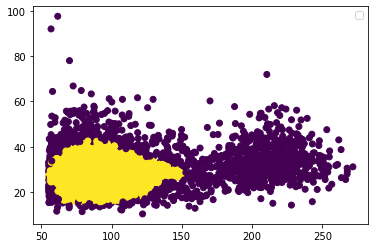

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=outlayer)
plt.legend()
plt.show()

In [44]:
X = full_df.values
forest.fit(X)
outlayer = forest.predict(X)

In [45]:
full_df['out'] = outlayer
full_df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,out
0,67.0,0.0,1.0,1.0,1.0,228.69,36.60,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1
1,61.0,0.0,0.0,1.0,0.0,202.21,32.56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1
2,80.0,0.0,1.0,1.0,0.0,105.92,32.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
3,49.0,0.0,0.0,1.0,1.0,171.23,34.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1
4,79.0,1.0,0.0,1.0,0.0,174.12,24.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,1.0,1.0,83.75,27.84,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
5106,81.0,0.0,0.0,1.0,1.0,125.20,40.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1
5107,35.0,0.0,0.0,1.0,0.0,82.99,30.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
5108,51.0,0.0,0.0,1.0,0.0,166.29,25.60,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [46]:
print(f"1 - {len(df[(full_df['stroke']==1) & (full_df['out']==-1)])}")
print(f"0 - {len(df[(full_df['stroke']==0) & (full_df['out']==-1)])}")

1 - 249
0 - 1669


In [47]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [48]:
X = full_df.iloc[:, :-2].values

In [49]:
forest.fit(X)
outlayer = forest.predict(X)

In [50]:
full_df['out'] = outlayer
full_df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,out
0,67.0,0.0,1.0,1.0,1.0,228.69,36.60,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1
1,61.0,0.0,0.0,1.0,0.0,202.21,32.56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1
2,80.0,0.0,1.0,1.0,0.0,105.92,32.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
3,49.0,0.0,0.0,1.0,1.0,171.23,34.40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4,79.0,1.0,0.0,1.0,0.0,174.12,24.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,1.0,1.0,83.75,27.84,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
5106,81.0,0.0,0.0,1.0,1.0,125.20,40.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1
5107,35.0,0.0,0.0,1.0,0.0,82.99,30.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
5108,51.0,0.0,0.0,1.0,0.0,166.29,25.60,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1


In [51]:
print(f"1 - {len(df[(full_df['stroke']==1) & (full_df['out']==-1)])}")
print(f"0 - {len(df[(full_df['stroke']==0) & (full_df['out']==-1)])}")

1 - 161
0 - 1942


In [52]:
full_df['stroke'].value_counts()

0.0    4861
1.0     249
Name: stroke, dtype: int64

In [53]:
new_df = full_df[(full_df['stroke']==0) & (full_df['out']==1) | (full_df['stroke']==1)]

In [54]:
new_df['stroke'].value_counts()

0.0    2919
1.0     249
Name: stroke, dtype: int64

In [55]:
full_df = full_df.drop(['out'], axis=1)
new_df = new_df.drop(['out'], axis=1)

In [56]:
full_df = full_df.sample(frac=1)
new_df = new_df.sample(frac=1)

In [57]:
knn = KNeighborsClassifier()
X = new_df.iloc[:, :-1].values
y = new_df['stroke'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test)

In [61]:
accuracy_score(y_pred, y_test)

0.9204545454545454

In [62]:
std = StandardScaler()
X_scaled = std.fit_transform(X_train)

In [63]:
X_test_scaled = std.transform(X_test)

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_scaled, y_train)
accuracy_score(knn.predict(X_test_scaled), y_test)

0.9583333333333334